# Домашнее задание №3

### *Практическое задание:*

В конце ноутбука создаются два массива с рукописными буквами и с характеристиками вина.  
Задание на дом: выбрать датасет, возможно, предварительно обработать, создать модель нейронной сети, обучить и проверить точность на тестовом датасете. Напишите свои мысли по поводу результатов.
При желании можно рассмотреть оба датасета, можете попробовать применить другие методы машинного обучения, известные вам, и сравнить результаты обучения.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import random as python_random

In [2]:
import tensorflow as tf

print(tf.__version__)
msg = tf.constant('TensorFlow Hello World')
tf.print(msg)

2.9.1
TensorFlow Hello World


In [3]:
from tensorflow import keras

# Датасет с рукописными буквами

https://www.tensorflow.org/datasets/catalog/binary_alpha_digits

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
classes = [str(i) for i in range(10)] +  list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

In [6]:
len(classes)

36

In [7]:
classes = [str(i) for i in range(10)] +  list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
print(classes)

X = np.load('binary_alpha_digits_images.npy')
Y = np.load('binary_alpha_digits_labels.npy')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [8]:
len(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))

26

In [9]:
X.shape, Y.shape

((1404, 20, 16), (1404,))

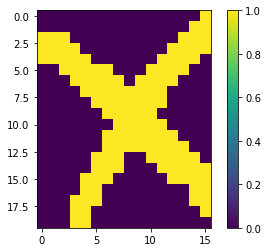

In [10]:
plt.figure()
plt.imshow(X[0])
plt.colorbar()
plt.grid(False)
plt.show()

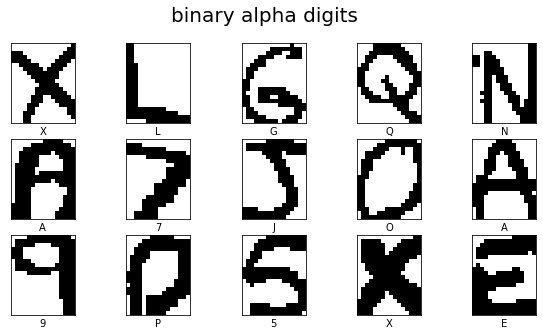

In [11]:
fig, axes = plt.subplots(3, 5, figsize=(10, 5))
fig.suptitle('binary alpha digits', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(X[n], cmap=plt.cm.binary)
    ax.set_xlabel(classes[Y[n]])
    n += 1

In [12]:
X = X / 255.0

#### Вариант 1

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 16)),
    keras.layers.Dense(128, activation='relu', 
                       kernel_regularizer=tf.keras.regularizers.L2(l2=10),
                       bias_regularizer=tf.keras.regularizers.L2(l2=0.1)),
    keras.layers.Dropout(0.05),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256, activation='relu'),   
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(62, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(36)
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense (Dense)               (None, 128)               41088     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                        

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
hstr = model.fit(X, Y, epochs=30, verbose=1)

Epoch 1/30
44/44 [==============================] - 2s 4ms/step - loss: 1068.0424 - accuracy: 0.0933
Epoch 2/30
44/44 [==============================] - 0s 4ms/step - loss: 265.2519 - accuracy: 0.2080
Epoch 3/30
44/44 [==============================] - 0s 4ms/step - loss: 53.9309 - accuracy: 0.2792
Epoch 4/30
44/44 [==============================] - 0s 4ms/step - loss: 10.5061 - accuracy: 0.3162
Epoch 5/30
44/44 [==============================] - 0s 4ms/step - loss: 3.6291 - accuracy: 0.3041
Epoch 6/30
44/44 [==============================] - 0s 4ms/step - loss: 2.8065 - accuracy: 0.3198
Epoch 7/30
44/44 [==============================] - 0s 4ms/step - loss: 2.5319 - accuracy: 0.3205
Epoch 8/30
44/44 [==============================] - 0s 4ms/step - loss: 2.4451 - accuracy: 0.3333
Epoch 9/30
44/44 [==============================] - 0s 4ms/step - loss: 2.3691 - accuracy: 0.3447
Epoch 10/30
44/44 [==============================] - 0s 4ms/step - loss: 2.3527 - accuracy: 0.3697
Epoch 11/30


#### Вариант 2

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 16)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(36)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [18]:
hstr = model.fit(X, Y, epochs=30, verbose=1)

Epoch 1/30
44/44 [==============================] - 1s 3ms/step - loss: 3.5814 - accuracy: 0.0577
Epoch 2/30
44/44 [==============================] - 0s 3ms/step - loss: 3.5721 - accuracy: 0.1118
Epoch 3/30
44/44 [==============================] - 0s 3ms/step - loss: 3.5576 - accuracy: 0.1189
Epoch 4/30
44/44 [==============================] - 0s 3ms/step - loss: 3.5341 - accuracy: 0.2350
Epoch 5/30
44/44 [==============================] - 0s 3ms/step - loss: 3.4998 - accuracy: 0.2607
Epoch 6/30
44/44 [==============================] - 0s 3ms/step - loss: 3.4518 - accuracy: 0.2642
Epoch 7/30
44/44 [==============================] - 0s 3ms/step - loss: 3.3914 - accuracy: 0.3219
Epoch 8/30
44/44 [==============================] - 0s 3ms/step - loss: 3.3180 - accuracy: 0.3718
Epoch 9/30
44/44 [==============================] - 0s 3ms/step - loss: 3.2344 - accuracy: 0.3981
Epoch 10/30
44/44 [==============================] - 0s 3ms/step - loss: 3.1443 - accuracy: 0.4174
Epoch 11/30
44/44 [

#### Основные выводы:

Более простая модель показала лучшие результаты на тренировочной выборке. Предполагаю, что это произошло за счет отчутствия регуляризации, что модет привести к переобучению и худшим результатам такой модели на тестовой выборке

Увеличение значения Дропаут, а также параметров регуляризации ведет к снижению целевой метрики

Увеличение количества слоев влияет на метрику незначительно

Увеличение количества эпох (в разумных рамках) улучшает результаты обеих моделей